In [1]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results
import pandas as pd

c:\Users\florence.boettger\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [3]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_vandenhende3")

In [4]:
study.sampler

In [5]:
# search_space = {"lambd": [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0], "temperature": [0.07, 0.1, 0.2]}
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_vandenhende3",
#     directions=["maximize", "minimize"],
#     sampler=optuna.samplers.GridSampler(search_space),
#     load_if_exists=True,
# )
# study.sampler

In [6]:
len(study.trials)

25

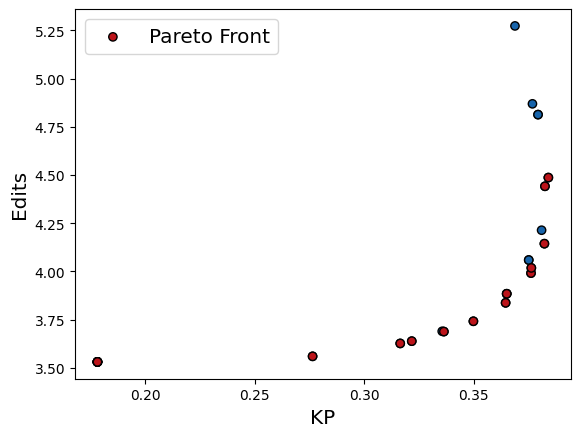

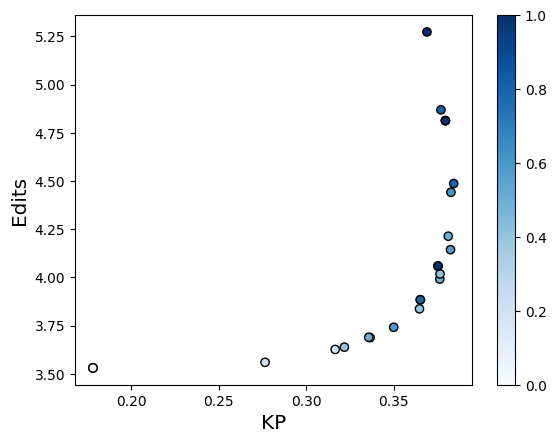

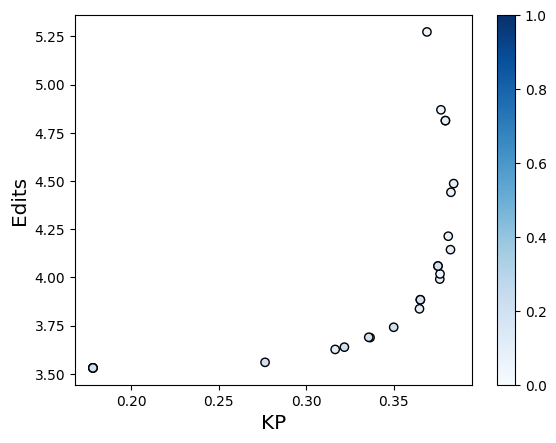

In [7]:
plot_study(study, "vandenhende", print_colorbar=False)
plot_study(study, "vandenhende_lambd", print_pareto=False, map=lambda t: t.params["lambd"])
plot_study(study, "vandenhende_temp", print_pareto=False, map=lambda t: t.params["temperature"])

In [8]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [9]:
hyperparams = ["lambd", "temperature"]

In [10]:
analyze_spearman(study, hyperparams, "vandenhende")

lambd correlation is: 0.715147095445268 on KP, 0.8566176107840321 on edits.
lambd pvalue is: 5.8779172763465434e-05 on KP, 4.650232893589127e-08 on edits.
temperature correlation is: -0.3957571328679983 on KP, -0.40437392891800134 on edits.
temperature pvalue is: 0.0501975261301589 on KP, 0.04497156023607974 on edits.


In [11]:
analyze_pearson(study, hyperparams)

lambd correlation is: 0.8064808268380707 on KP, 0.7708287894510665 on edits.
lambd pvalue is: 1.126564265883913e-06 on KP, 6.517341782382649e-06 on edits.
temperature correlation is: -0.2126455943927828 on KP, -0.47949540293527787 on edits.
temperature pvalue is: 0.30747873325256675 on KP, 0.015291781762591133 on edits.


In [12]:
results = combine_results("optimize_counterfactuals_vandenhende")